In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
length_seconds = 4;

# Sample rate (samples per second).
sample_rate = 48000;
length = length_seconds * sample_rate;

# The frequencies of our two sine waves. Should be able to hear 1000 to 10000 Hz.
frequency1 = 1000;
frequency2 = 5000;

In [3]:
# Create array of time samples.
t = np.linspace(0, length_seconds, length, endpoint=False)

In [4]:
# Append the two sine waves in time.

# The length of each interval in samples.
length_interval = 0.2 * 48000;

# The number of intervals.
n_intervals = int(length / length_interval)

x = np.array([])
for i in range(n_intervals):
    if np.mod(i,2) == 1:
        freq = frequency1
    else:
        freq = frequency2
    
    x = np.append(x,np.sin(2*np.pi*freq * t[int(i*length_interval):int((i*length_interval)+length_interval)]))

In [5]:
# Play the clip.
ipd.Audio(x, rate=sample_rate)

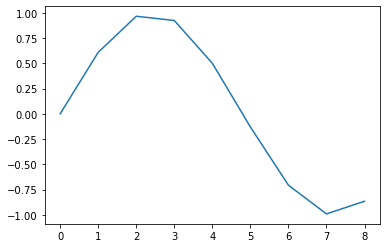

In [7]:
# Plot one period of sin wave.
plt.plot(x[0:int(sample_rate/frequency2)])

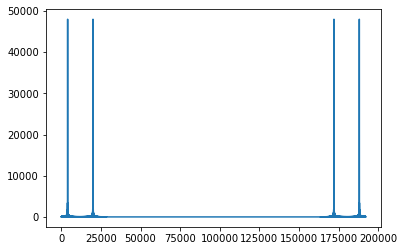

In [8]:
# Compute the 1D DFT
f = np.fft.fft(x)

# Plot the 1D DFT
plt.plot(abs(f))

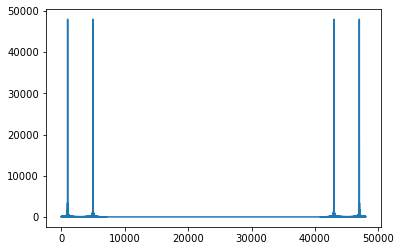

In [9]:
# Now with correctly labeled frequency axis.
f_axis = np.linspace(0, sample_rate, length, endpoint=False)
plt.plot(f_axis, abs(f))

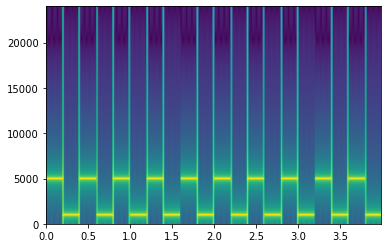

In [10]:
# Compute spectrogram.
spectrogram, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sample_rate, noverlap=0)

In [11]:
print(spectrogram.ndim)
print(spectrogram.shape)

2
(513, 187)


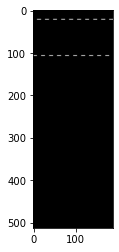

In [12]:
# Display spectrogram as a grayscale image.
plt.imshow(spectrogram,cmap='gray')

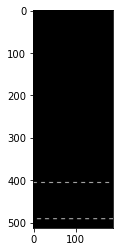

In [13]:
# Flip it vertically.
spectrogram = np.flip(spectrogram, 0)
plt.imshow(spectrogram,cmap='gray')


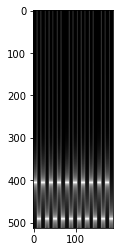

In [14]:
# Compute log_10 of spectrogram. Add eps to make sure don't take log of 0.
spectrogram_log = np.log10( spectrogram + np.finfo(float).eps)
plt.imshow(spectrogram_log,cmap='gray')

In [15]:
# Normalize so values range from 0 to 1.
print(np.amin(spectrogram_log))
print(np.amax(spectrogram_log))
spectrogram_log = (spectrogram_log - np.amin(spectrogram_log)) / (np.amax(spectrogram_log) - np.amin(spectrogram_log))
print(np.amin(spectrogram_log))
print(np.amax(spectrogram_log))

-15.653559285385501
-2.2110514212669363
0.0
1.0


In [16]:
plt.imsave('two_sines_spect_alt.png', spectrogram_log, cmap='gray')